In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
df=pd.read_csv("D:\Projects\Data file.csv")
df.head(2)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.05,3065.15,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.00,12124.75,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,2016-08-10


### Preprocessing and EDA:

In [3]:
# checking dataset shape
df.shape

(209593, 37)

In this dataset we have 209593 rows and 37 columns present.

In [4]:
# checking all the column names in the dataset
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
# checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
# checking unique values of each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

'Unnamed:0' is a index column in raw dataset so we can drop it here itself. And pcircle has only one entry throughout so it will have no contribution with our model training we can drop this column also. Also msisdn is a column with phone numbers of users so this column has no contribution on model building.

In [7]:
# Droping Unnamed: 0, msisdn and pcircle column
df.drop(['Unnamed: 0','msisdn','pcircle'],axis=1,inplace=True)

In [8]:
# checking null values in the dataset
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

There is no null values present in the dataset. so it's a good dataset

In [9]:
# checking unique values of target column
df['label'].unique()

array([0, 1], dtype=int64)

There are only two unique values preseted in target column so it's a binary classification problem.

# Feature Extraction:

In [10]:
# converting object data type to datetime datatype
df['pdate'] =  pd.to_datetime(df['pdate'])

In [11]:
# Extracting paid year,month and day from pdate

# Extracting year
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year

# Extracting month
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month

# Extracting day
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

In [12]:
df.pyear.unique()

array([2016], dtype=int64)

In [13]:
# droping pdate column after extraction
df = df.drop(["pdate","pyear"],axis=1)

In [14]:
# checking the value counts of last_rech_date_da column
df.last_rech_date_da.value_counts()

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
635922.630667         1
684933.969169         1
779774.580500         1
627095.756936         1
508947.450202         1
Name: last_rech_date_da, Length: 1174, dtype: int64

In [15]:
#Checking the value counts of last_rech_date_da column
df.cnt_da_rech30.value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
63823.301647         1
32152.874529         1
45934.211400         1
57073.740639         1
38828.342205         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

In [16]:
# checking the value counts of fr_da_rech30 column
df.fr_da_rech30.value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
738055.326743         1
811998.243560         1
792892.884579         1
540679.626283         1
849620.029563         1
Name: fr_da_rech30, Length: 1072, dtype: int64

In [17]:
# checking the value counts of cnt_da_rech90 column
df.cnt_da_rech90.value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64

In [18]:
# checking the value counts of fr_da_rech90 column
df.fr_da_rech90.value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
16        14
17        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
23         5
37         5
57         3
35         2
41         2
46         1
56         1
55         1
33         1
43         1
42         1
39         1
64         1
Name: fr_da_rech90, dtype: int64

In [19]:
# checking the value counts of medianamnt_loans30 column
df.medianamnt_loans30.value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

I checked for all columns but for only the above columns over 90% of there entry is 0 which might create skewness in the dataset so removing these columns

In [20]:
# droping columns with more than 90% zeros
df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [21]:
# checking description of data set
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,...,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,...,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


 I can observe negative values in some columns

* aon : age on cellular network in days
* daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
* daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
* rental30 : Average main account balance over last 30 days
* rental90 : Average main account balance over last 90 days
* last_rech_date_ma : Number of days till last recharge of main account
* medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
* medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupiah)

The above columns can not be negative as they are age, account balance and number of days. So we will change them to positive.

In [22]:
# converting all negative values to positive values in above columns
df['aon']=abs(df['aon'])
df['daily_decr30']=abs(df['daily_decr30'])
df['daily_decr90']=abs(df['daily_decr90'])
df['rental30']=abs(df['rental30'])
df['rental90']=abs(df['rental90'])
df['last_rech_date_ma']=abs(df['last_rech_date_ma'])
df['medianmarechprebal30']=abs(df['medianmarechprebal30'])
df['medianmarechprebal90']=abs(df['medianmarechprebal90'])

In [23]:
# checking if there are other entries in maxamnt_loans30 column except 0,6,12 
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']

118       61907.697372
125       22099.413732
146       98745.934048
369       58925.364061
374       78232.464324
              ...     
209189    50824.996349
209262    17324.994582
209331    92864.501728
209392    54259.265687
209424    96927.243252
Name: maxamnt_loans30, Length: 1047, dtype: float64

Converting all the above values to zero as it is specified in the problem statement we can have only 0,6,12 as maximum amount of loan taken by the user in last 30 days.

In [24]:
# converting the above values into zero
df.loc[(df['maxamnt_loans30'] != 6.0) & (df['maxamnt_loans30'] != 12.0) & (df['maxamnt_loans30']!=0.0), 'maxamnt_loans30']=0.0
df.maxamnt_loans30.value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [25]:
# droping the people who haven't taken any loan
df.drop(df[df['amnt_loans90']==0].index, inplace = True)

In [26]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,...,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000,207550.000000
mean,0.873948,8095.625616,5352.453575,6044.996776,2697.321812,3477.845090,3744.568567,2057.044751,3.991477,3728.164201,...,2.786138,18.128730,6.689790,18.610723,23.878150,6.769116,3.421201,4.350039,6.787560,14.429159
std,0.331908,75605.518933,9208.677568,10902.799534,4258.460653,5698.968928,53813.257533,2363.829442,4.264318,53603.753070,...,2.552263,17.373116,2.107794,225.235874,26.495145,2.005785,8.796510,10.294639,0.737225,8.421331
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.760000,41.983500,299.690000,326.340000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,527.000000,1414.400000,1443.355000,1088.165000,1332.425000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.714286,7.000000,14.000000
75%,1.000000,982.000000,7200.000000,7723.997500,3334.750000,4167.762500,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.800000,4.500000,7.000000,21.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.000000


### Visualizations:

In [27]:
col=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

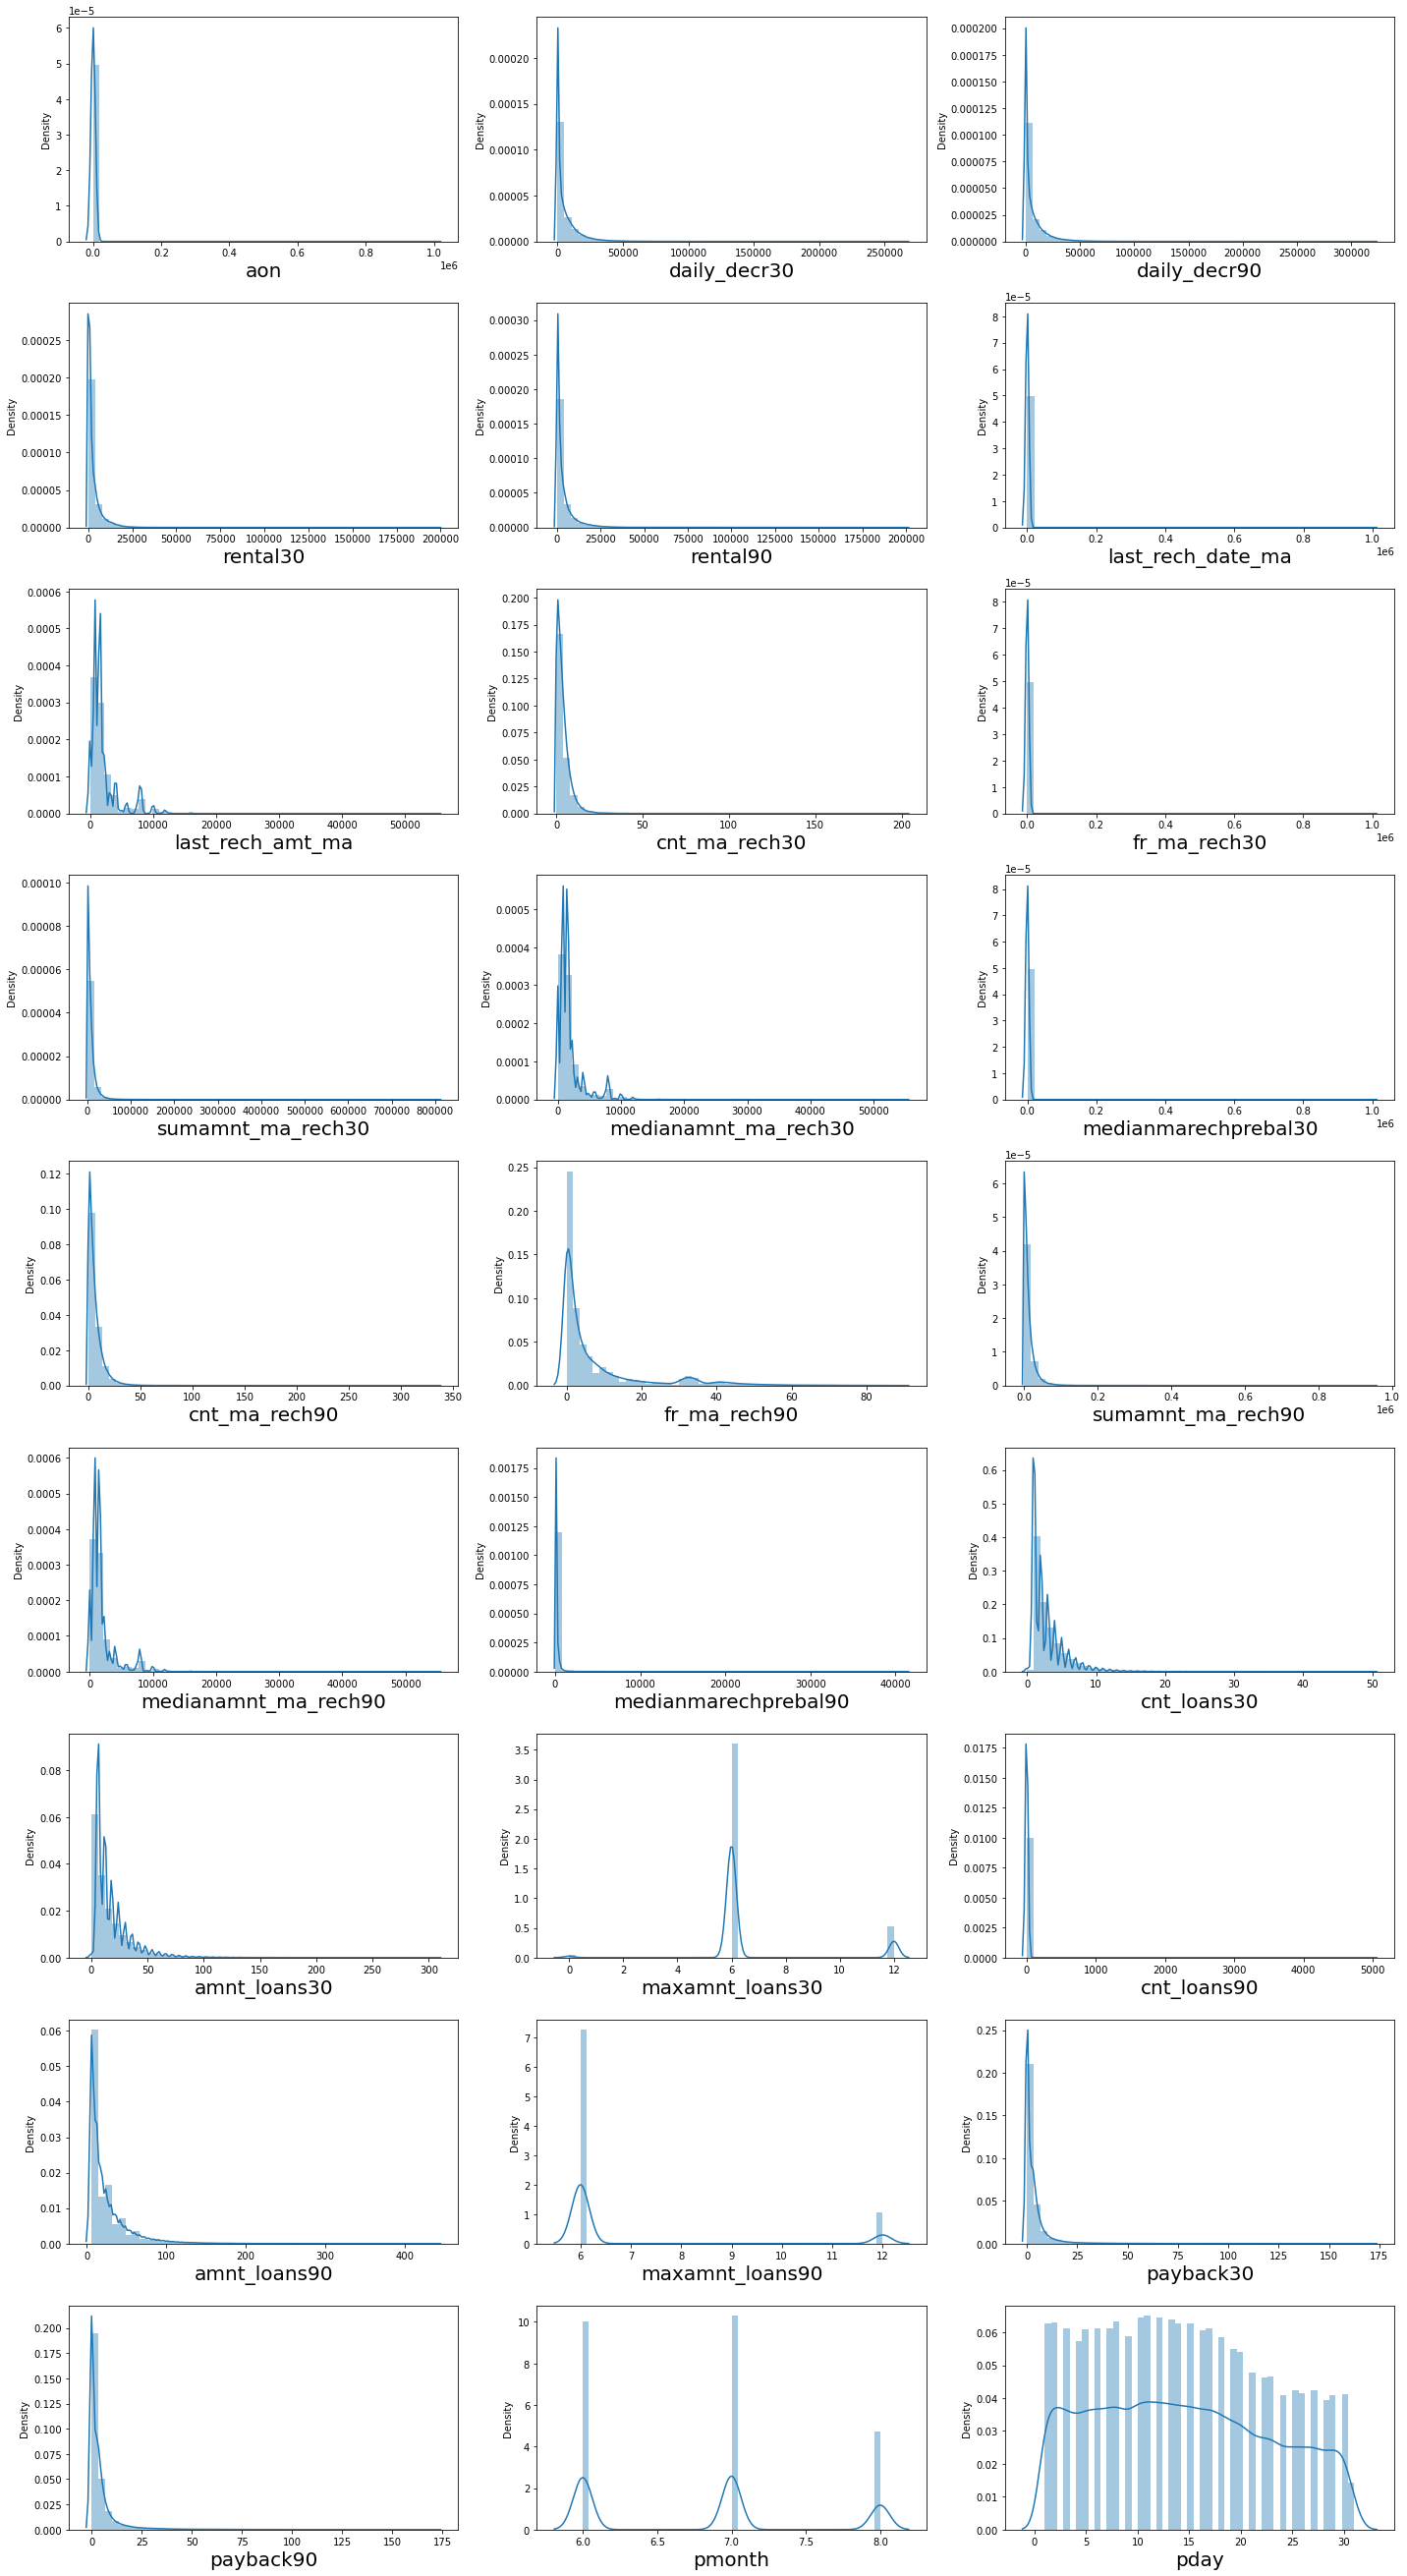

In [28]:
# distribution plot for all numerical columns except label
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

* I can clearly see that there is skewness in most of the columns so we have to treat them.

### Checking for outliers:

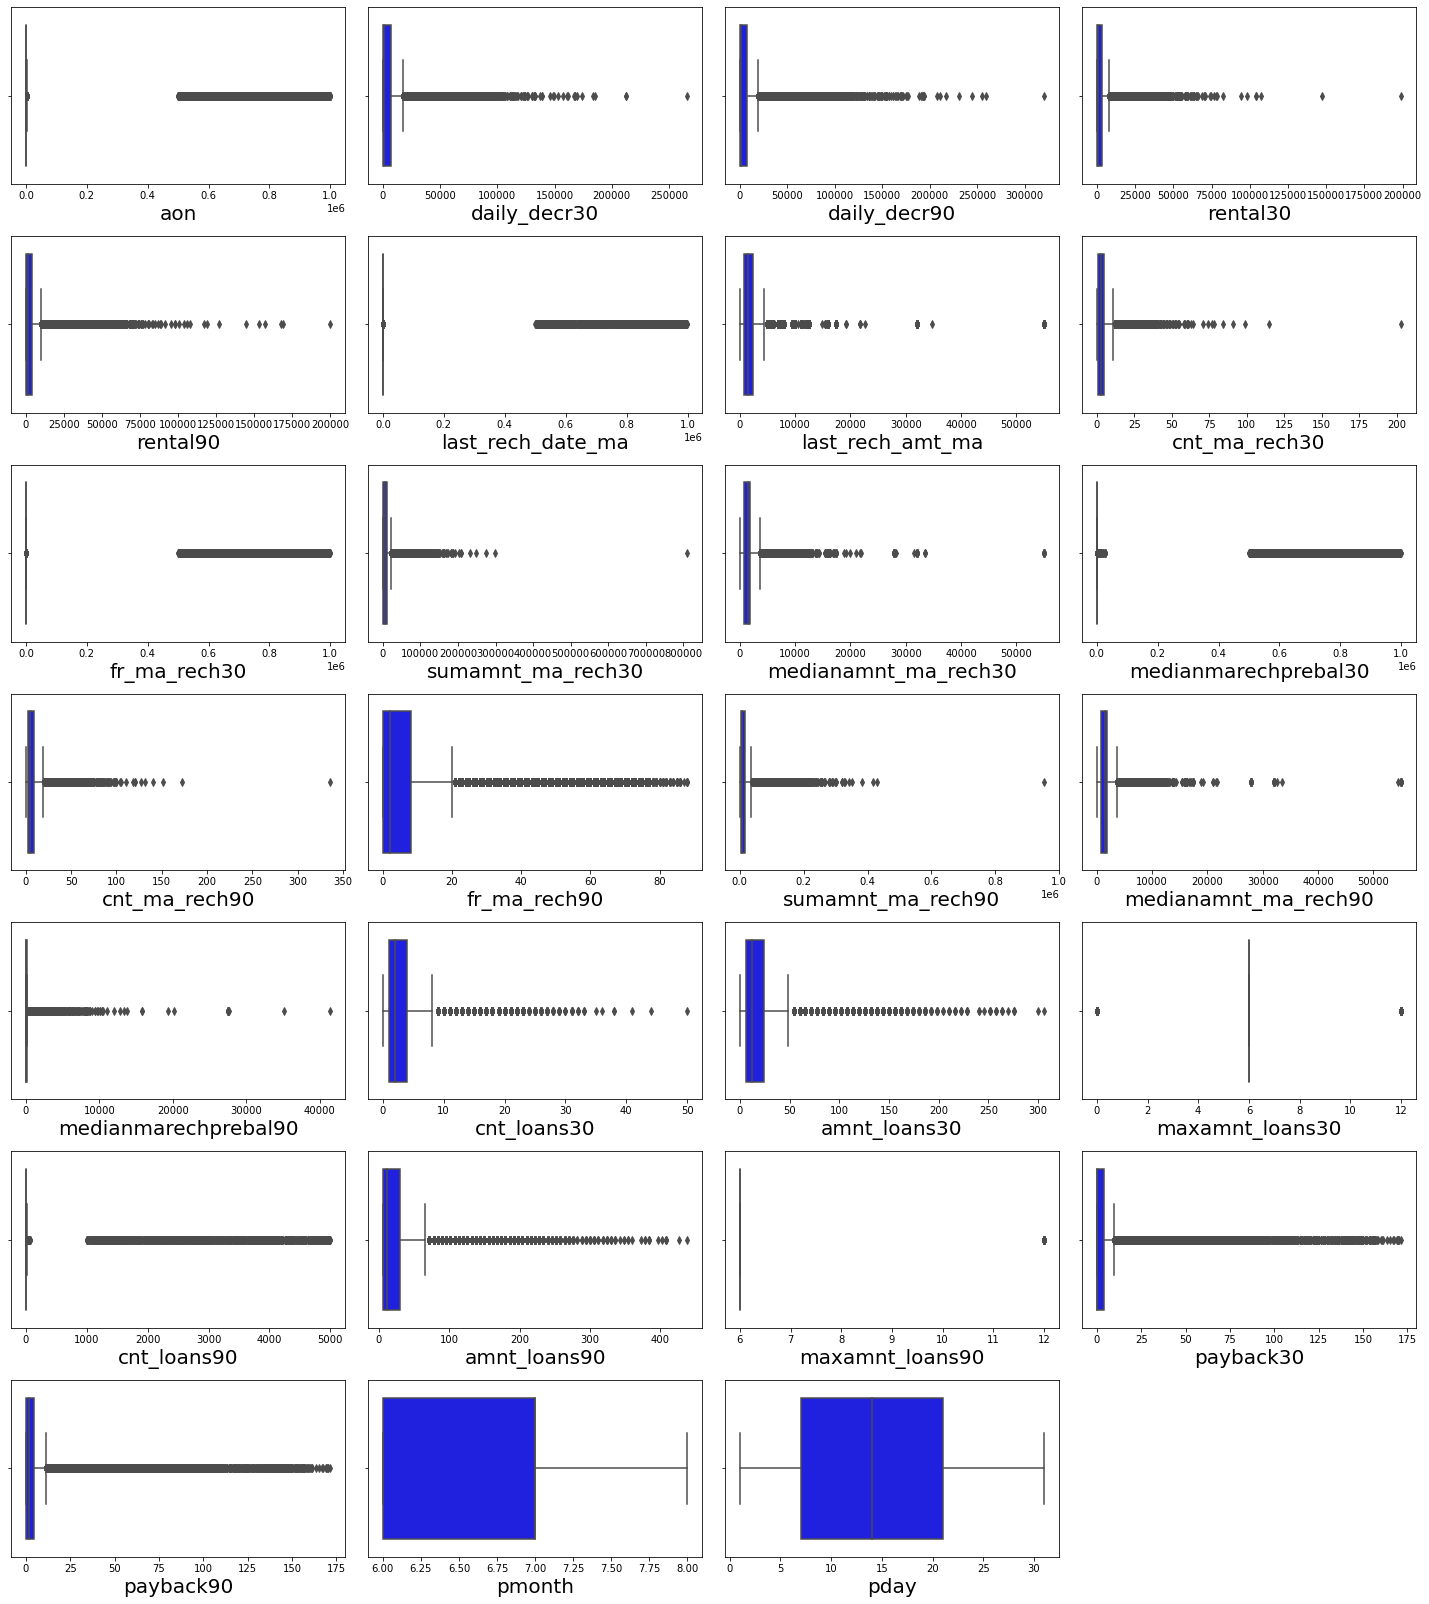

In [29]:
# identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The outliers are present in almost all columns except some.

### Removing Outliers:

In [30]:
# ZScore Method:
# The features having outliers are
features=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

Above are the list of columns with outliers in the dataset.

In [31]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22


In [32]:
# lets checks the shape of new dataset
df_new.shape

# checking the shape of old dataset
df.shape

# checking  the dataloss in zscore method
Dataloss = (((207550-170071)/207550)*100)
Dataloss

18.05781739339918

* In Z-score method the data loss is more than 10% so let me have a look into percentile method to remove outliers.

In [33]:
# Percentile Method:
# removing outliers using percentile method
for colu in features:
    if df[colu].dtypes != 'object':
        percentile = df[colu].quantile([0.01,0.98]).values
        df[colu][df[colu]<=percentile[0]]=percentile[0]
        df[colu][df[colu]>=percentile[1]]=percentile[1]

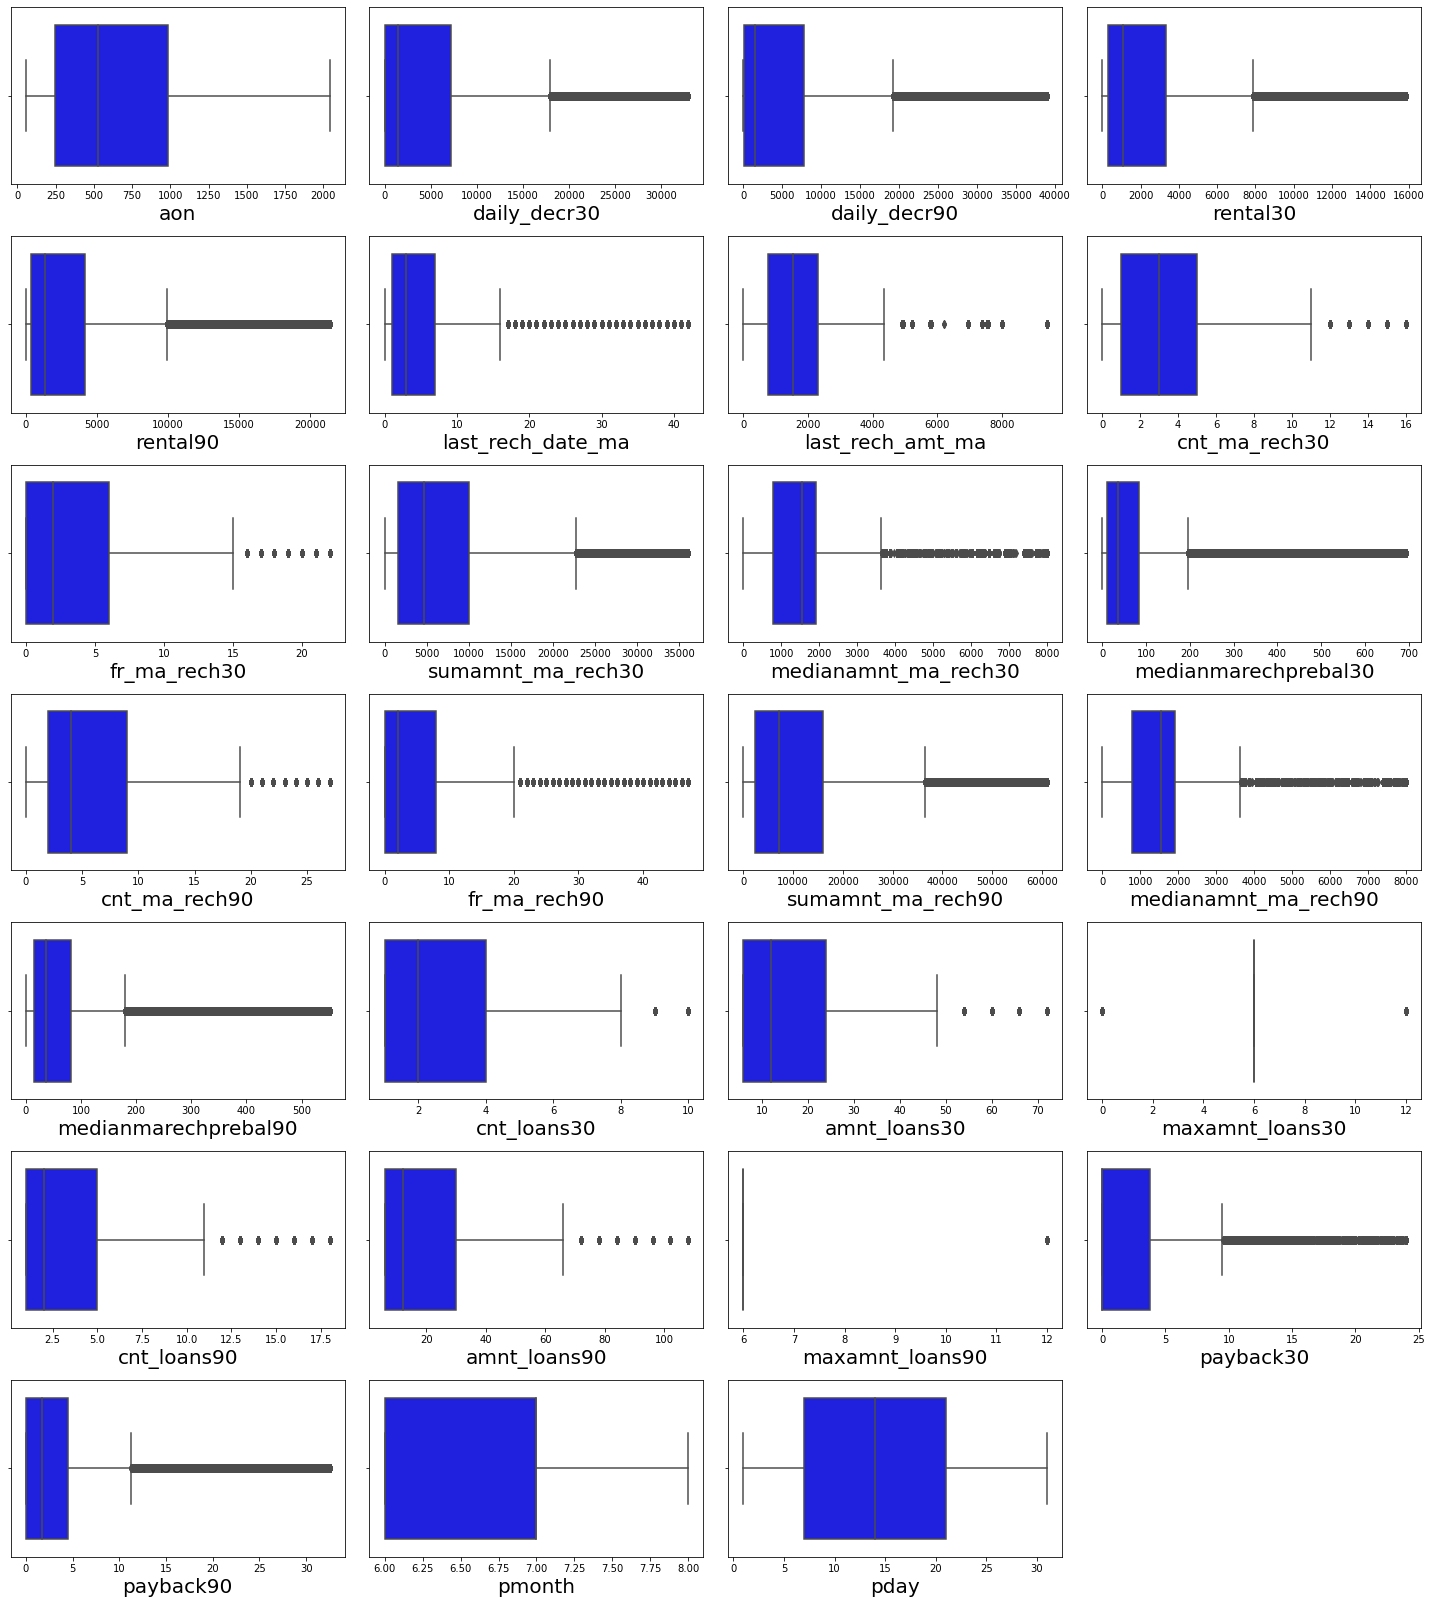

In [34]:
# let's check  the outliers is reduced or not

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Checking for skewness:

In [35]:
# checking for skewness in the dataset
df.skew()

label                  -2.253346
aon                     0.934791
daily_decr30            1.978547
daily_decr90            2.098290
rental30                2.117210
rental90                2.205817
last_rech_date_ma       2.565623
last_rech_amt_ma        2.016661
cnt_ma_rech30           1.410702
fr_ma_rech30            1.703431
sumamnt_ma_rech30       1.749207
medianamnt_ma_rech30    2.122065
medianmarechprebal30    2.799234
cnt_ma_rech90           1.566573
fr_ma_rech90            1.987801
sumamnt_ma_rech90       1.863681
medianamnt_ma_rech90    2.143777
medianmarechprebal90    2.631175
cnt_loans30             1.597669
amnt_loans30            1.752260
maxamnt_loans30         1.634976
cnt_loans90             2.000454
amnt_loans90            1.910837
maxamnt_loans90         2.224471
payback30               2.635055
payback90               2.826565
pmonth                  0.358219
pday                    0.184762
dtype: float64

The  skewness present in almost all columns except pmonth,pday and as label is my target i should not remove skewness from this column.

### Removing skewness using yeo-johnson method:

In [36]:
#Creating a list of skewed features
fea=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

In [37]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df[fea] = scaler.fit_transform(df[fea].values)

# checking skewness again
df[fea].skew()

aon                    -0.059261
daily_decr30           -0.137650
daily_decr90           -0.127335
rental30               -0.062522
rental90               -0.062946
last_rech_date_ma       0.043916
last_rech_amt_ma       -0.106643
cnt_ma_rech30          -0.010536
fr_ma_rech30            0.131926
sumamnt_ma_rech30      -0.369147
medianamnt_ma_rech30   -0.237104
medianmarechprebal30   -0.046085
cnt_ma_rech90          -0.012334
fr_ma_rech90            0.141522
sumamnt_ma_rech90      -0.266852
medianamnt_ma_rech90   -0.101431
medianmarechprebal90   -0.029793
cnt_loans30             0.219771
amnt_loans30            0.146844
maxamnt_loans30         0.381337
cnt_loans90             0.201541
amnt_loans90            0.129122
maxamnt_loans90         0.000000
payback30               0.278283
payback90               0.193524
dtype: float64

Skewness in all the columns has been reduced.

### Separating Features and Target:

In [38]:
x = df.drop("label",axis=1)
y = df["label"]

### Scaling the data using StandardScaler scaler:

In [39]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

# Checking correlation

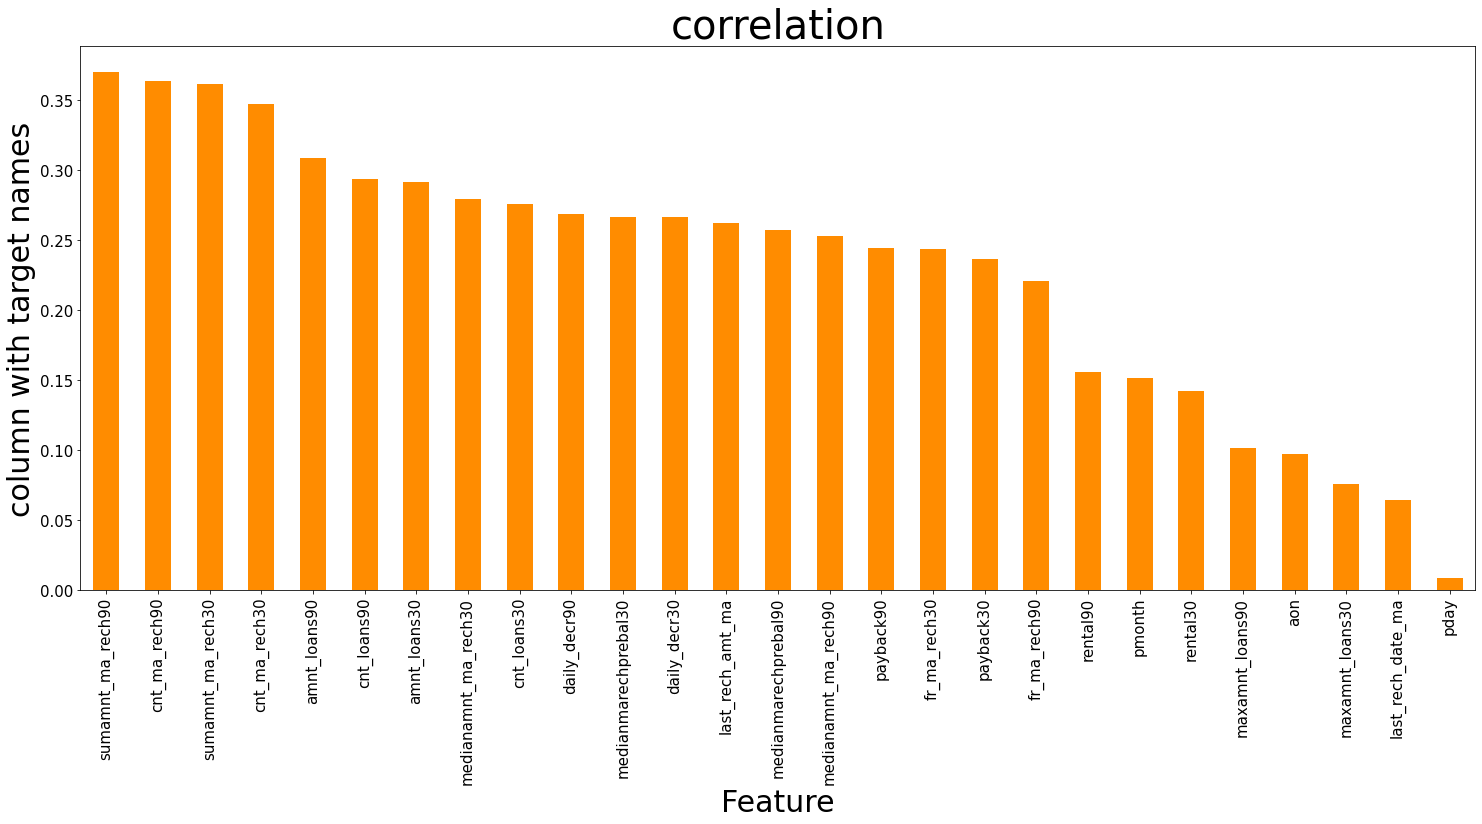

In [40]:
plt.figure(figsize=(25,10))
df.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='darkorange')
plt.xlabel('Feature',fontsize=30)
plt.ylabel('column with target names',fontsize=30)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.title('correlation',fontsize=40)
plt.show()

We don't find any columns with negligible correlation. Even though pday is less correlated we can keep it and proceed.

### Checking correlation using heat map:

<AxesSubplot:>

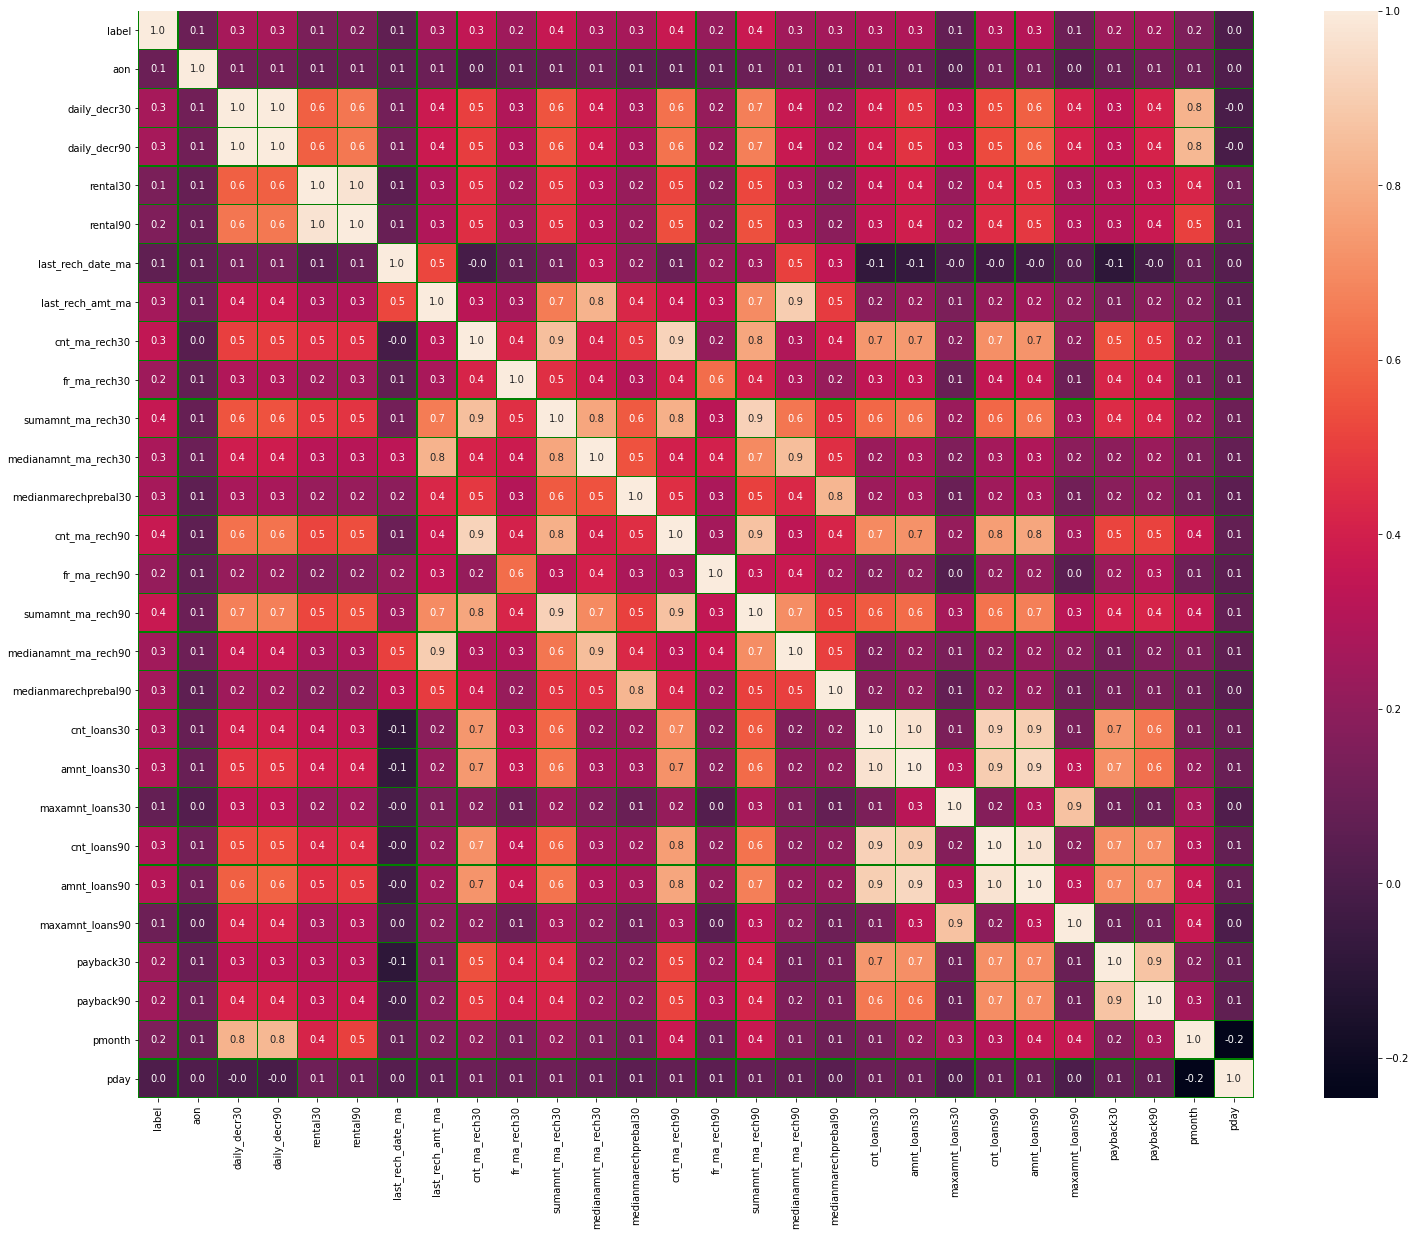

In [41]:
# visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True, linewidths=0.2,linecolor="green",fmt='.1f')

we can see some multicollinearity in the dataset between these features
* daily_decr30 - daily_decr90
* rental30 - rental90
* cnt_loans30 - amnt_loans30
* sumamnt_ma_rech30 - sumamnt_ma_rech90
* cnt_ma_rech30 - cnt_ma_rech90
* cnt_loans90 - amnt_loans90

### Checking Multicollinearity using VIF

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.038368,aon
1,475.903046,daily_decr30
2,536.091889,daily_decr90
3,27.619819,rental30
4,31.144821,rental90
5,1.909283,last_rech_date_ma
6,6.618998,last_rech_amt_ma
7,48.336467,cnt_ma_rech30
8,2.025772,fr_ma_rech30
9,75.706439,sumamnt_ma_rech30


on the basis of VIF score and correlation with target variable came to the conclusion to drop following columns
* daily_decr30 , rental30 , cnt_loans30 , sumamnt_ma_rech30 , cnt_ma_rech30 , cnt_loans90

### Balancing the target variable using oversampling

In [43]:
# checking the value count of target column
y.value_counts()

1    181388
0     26162
Name: label, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)
# checking the value counts again
y.value_counts()

1    181388
0    181388
Name: label, dtype: int64

# Model Building

### Finding Best Random State and Accuracy:

In [45]:
# importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [46]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9115066202346714  on Random_state  124


Got the best accuracy and random state.

In [47]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [48]:
# importing necessary libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

#### 1. XGB Classifier:

In [50]:
XGB=XGBClassifier(verbosity=0)
XGB.fit(X_train,y_train)
predxg=XGB.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predxg)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predxg))
print(classification_report(y_test,predxg))

#cross validation score
scores = cross_val_score(XGB, x, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 94.54852847941342
Confusion Matrix: [[51004  3238]
 [ 2695 51896]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     54242
           1       0.94      0.95      0.95     54591

    accuracy                           0.95    108833
   macro avg       0.95      0.95      0.95    108833
weighted avg       0.95      0.95      0.95    108833


Cross validation score : 93.4929894371647
\Accuracy_Score - Cross Validation Score : 1.055539042248725


XGBClassifier is giving me almost 94.5% accuracy.

#### 2.DecisionTreeClassifier:

In [51]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, preddt)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(DTC, x, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 91.17730835316495
Confusion Matrix: [[49879  4363]
 [ 5239 49352]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     54242
           1       0.92      0.90      0.91     54591

    accuracy                           0.91    108833
   macro avg       0.91      0.91      0.91    108833
weighted avg       0.91      0.91      0.91    108833


Cross validation score : 90.79571844280974
\Accuracy_Score - Cross Validation Score : 0.38158991035520273


DecisionTreeClassifier is giving me 91% accuracy.

#### 3.BaggingClassifier:

In [52]:
BC=BaggingClassifier()
BC.fit(X_train,y_train)
predbc=BC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predbc)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

#cross validation score
scores = cross_val_score(BC, x, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 93.71606038609613
Confusion Matrix: [[51607  2635]
 [ 4204 50387]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     54242
           1       0.95      0.92      0.94     54591

    accuracy                           0.94    108833
   macro avg       0.94      0.94      0.94    108833
weighted avg       0.94      0.94      0.94    108833


Cross validation score : 93.22945162071272
\Accuracy_Score - Cross Validation Score : 0.4866087653834086


BaggingClassifier is giving me almost 94% accuracy.

#### 4.AdaBoostClassifier:

In [53]:
ABC=AdaBoostClassifier()
ABC.fit(X_train,y_train)
predab=ABC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predab)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predab))
print(classification_report(y_test,predab))

#cross validation score
scores = cross_val_score(ABC, x, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 84.92093390791396
Confusion Matrix: [[47032  7210]
 [ 9201 45390]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     54242
           1       0.86      0.83      0.85     54591

    accuracy                           0.85    108833
   macro avg       0.85      0.85      0.85    108833
weighted avg       0.85      0.85      0.85    108833


Cross validation score : 84.92569522312496
\Accuracy_Score - Cross Validation Score : -0.004761315210998873


AdaBoost Classifier is giving me 85% accuracy.

#### 5.Logistic Regression

In [54]:
LR=LogisticRegression(penalty='l2')
LR.fit(X_train,y_train)
predlr=LR.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predlr)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

#cross validation score
scores = cross_val_score(LR, x, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("\Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 77.10528975586449
Confusion Matrix: [[42778 11464]
 [13453 41138]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     54242
           1       0.78      0.75      0.77     54591

    accuracy                           0.77    108833
   macro avg       0.77      0.77      0.77    108833
weighted avg       0.77      0.77      0.77    108833


Cross validation score : 77.07704060849807
\Accuracy_Score - Cross Validation Score : 0.0282491473664237


Logistic Regression is giving me 77% accuracy.

By looking into the difference of model accuracy and cross validation score i found BaggingClassifier as the best model with 93.7% accuracy and the difference between model accuracy and cross validation score is 0.48.

#### ROC-AUC curve:

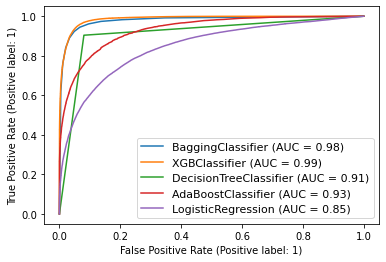

In [55]:
# Plotting ROC for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(BC,X_test,y_test)
plot_roc_curve(XGB, X_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(LR, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Above is the ROC curves for all the models that i have predicted.And the AUC values can also be seen in the plot.

* AUC value is high for XGBClassifier and BaggingClassifier.I got least difference in model accuracy and cross validation score for BaggingClassifier so BC is my best model.

### Hyper Parameter tuning

In [56]:
# importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [62]:
parameter = {'bootstrap':['True','False'],
             'n_jobs': [-2,-1,1],
             'n_estimators':[10,20,30,40],
             'warm_start':['True','False']}

The parameters list for bagging classifier model.

In [59]:
GCV=GridSearchCV(BaggingClassifier(),parameter,cv=5)
GCV.fit(X_train,y_train)

Final_mod=BaggingClassifier(bootstrap='True', n_jobs=-1,warm_start='True', n_estimators=40)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 94.37211140003492
Confusion matrix: [[51399  2843]
 [ 3282 51309]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     54242
           1       0.95      0.94      0.94     54591

    accuracy                           0.94    108833
   macro avg       0.94      0.94      0.94    108833
weighted avg       0.94      0.94      0.94    108833



Our model accuraccy has increased from 93.7% to 94.37% that's good.

#### AUC ROC CURVE for final model:

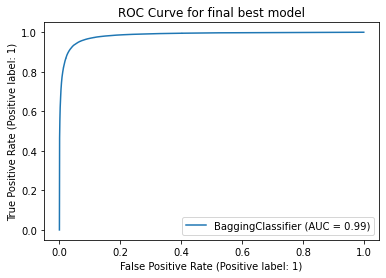

In [60]:
# ploting ROC curve for final best model
plot_roc_curve(Final_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

* after hyperparameter tuning we got improvement in roc curve and AUC also.

### Saving the model:

In [61]:
# saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"MicroCreditLoan.pkl")

['MicroCreditLoan.pkl']